In [ ]:
import numpy as np
import matplotlib.pylab as plt
def graph(name):
    # Determinar dimensiones de la malla
    data = np.loadtxt(f"../data/{name}", skiprows=3)
    X = data[:,2]
    Y = data[:,3]
    U = data[:,4]#.reshape(5,5)
    V = data[:,5]#.reshape(5,5)
    P = data[:,6]#.reshape(5,5)
    XY = np.meshgrid(X,Y)


    nx = len(np.unique(X))
    ny = len(np.unique(Y))

    # Redimensionar arrays
    X_grid = X.reshape(ny, nx)
    Y_grid = Y.reshape(ny, nx)
    U_grid = U.reshape(ny, nx)
    V_grid = V.reshape(ny, nx)
    P_grid = P.reshape(ny, nx)

    # Crear figura combinada
    plt.figure(figsize=(8, 6))

    # Mapa de contorno de presión
    contour = plt.contourf(X_grid, Y_grid, P_grid, cmap='viridis')
    plt.colorbar(contour, label='Presión P')

    # Superponer campo vectorial de velocidades
    plt.quiver(X_grid, Y_grid, U_grid*5, V_grid*5, color='black', scale=10)

    # Etiquetas y formato
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Presión y Campo de Velocidades')
    plt.axis('equal')
    plt.tight_layout()
    plt.grid(True)
    plt.savefig(f"../images/{name}.png")
    plt.show()

In [ ]:
graph("campos_510.txt")

In [ ]:
file_names = [f"campos_{i:03}.txt" for i in range(510, 1990, 10)]

# Crear todas las imágenes (se guardan, no se muestran)
for f in file_names:
    graph(f)

# Mostrar solo las primeras 10
from IPython.display import Image, display

for f in file_names[:10]:
    display(Image(filename=f"../images/{f}.png"))


## Animación 1:  Fluido en una cavidad con paredes rigidas

In [ ]:
import imageio.v2 as imageio
from IPython.display import Image

# Rutas de las imágenes
file_names = [f"../images/campos_{i:03}.txt.png" for i in range(510, 1990, 10)]

# Crear animación GIF con loop infinito
with imageio.get_writer("../graph/cavity_flow.gif", mode="I", duration=0.2, loop=0) as writer:
    for filename in file_names:
        image = imageio.imread(filename)
        writer.append_data(image)

print("GIF guardado como ../graph/cavity_flow.gif")

# Mostrar en Jupyter
Image(filename="../graph/cavity_flow.gif")


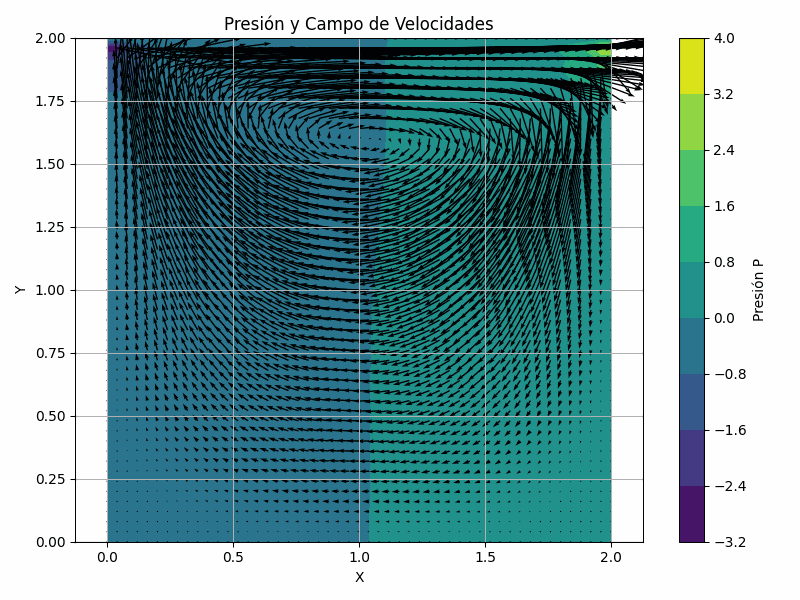

In [16]:
import imageio.v2 as imageio
from IPython.display import Image
# Mostrar en Jupyter
Image(filename="../graph/cavity_flow.gif")
